<a href="https://colab.research.google.com/github/Leorah-Bathula/OIBSIP_TASK3/blob/main/CAR_PRICE_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
#LOADING THE DATA SET
df = pd.read_csv('/content/car data.csv')

In [ ]:
#DISPLAYING THE WHOLE DATASET
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
#TO GET FIRST FIVE ROWS OF THE GIVEN DATASET
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#TO GET THE NUMBER OF ROWS AND COLUMNS
df.shape

(301, 9)

In [ ]:
#TO DISPLAY THE INFORMATION OF THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#TO KNOW THE NUMBER OF MISSING VALUES
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#TO KNOW THE DISTRIBUTION OF CATEGORICAL DATA
print(df.Car_Name.value_counts())
print(df.Year.value_counts())
print(df.Selling_Price.value_counts())
print(df.Present_Price.value_counts())
print(df.Driven_kms.value_counts())
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())
print(df.Owner.value_counts())

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1
7.27      1
15.04     1
12.50     1
Name: Present_Price, Length: 148, dtype: int64
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400

In [ ]:
#ENCODING THE REQUIRED VALUES
#encoding "fueltype" column
df.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1 ,'CNG': 2}}, inplace=True)
#encoding "sellingtype" column
df.replace({'Selling_type':{'Dealer': 0, 'Individual':1}}, inplace=True)
#encoding "transmission" column
df.replace({'Transmission': {'Manual' :1, 'Automatic':1}}, inplace=True)


In [ ]:
#DISPLAYING THE FIRST FIVE ROWS OF THE DATA SET
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
#SPLITTING THE DATA AND TARGET VALUES
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             1   
1    2013           9.54       43000          1             0             1   
2    2017           9.85        6900          0             0             1   
3    2011           4.15        5200          0             0             1   
4    2014           6.87       42450          1             0             1   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             1   
297  2015           5.90       60000          0             0             1   
298  2009          11.00       87934          0             0             1   
299  2017          12.50        9000          1             0             1   
300  2016           5.90        5464          0             0             1   

     Owner  
0        0  
1        0  
2        0  

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size = 0.1 ,random_state=2)

In [ ]:
#TRAINING THE MODEL
#LINEAR REGRESSION
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#PREDICTING THE DATASET
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.87165715977915


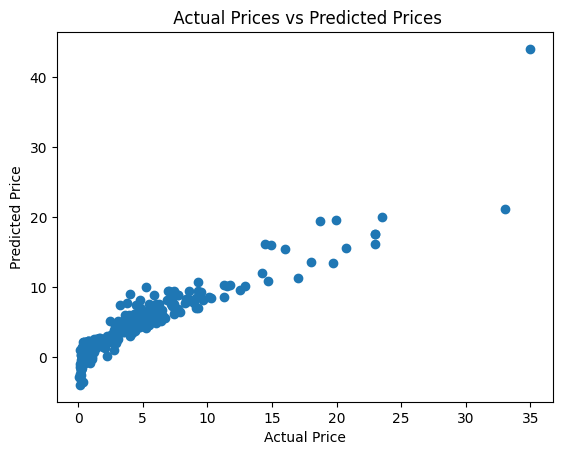

In [ ]:
#VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter (Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#PREDICTION ON TRAINING DATA
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
#R squared error
error_score = metrics.r2_score (Y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.8340577535179424


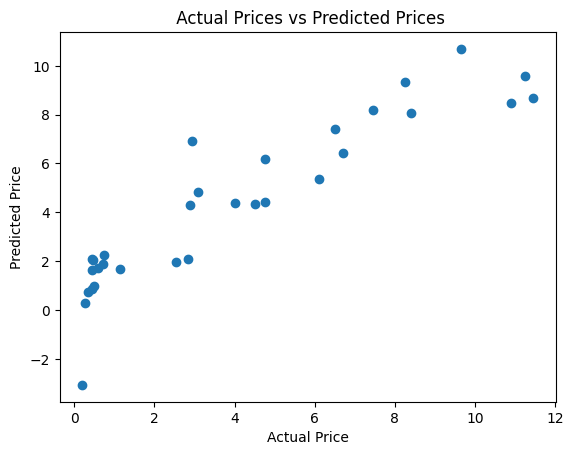

In [ ]:
#PLOTTING ACTUAL PRICES VS PREDICTED PRICES
plt.scatter (Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()